# Land Usage Classification

Data from: https://www.kaggle.com/datasets/apollo2506/landuse-scene-classification/data

Don't forget to upload kaggle.json

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
# ! kaggle competitions download name of data set

In [4]:
! kaggle datasets download apollo2506/landuse-scene-classification

100% 1.98G/1.98G [01:37<00:00, 23.1MB/s]
100% 1.98G/1.98G [01:37<00:00, 21.8MB/s]


In [5]:
! ls
! sudo apt-get install unzip

kaggle.json  landuse-scene-classification.zip  sample_data
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [25]:
! unzip landuse-scene-classification.zip

Archive:  landuse-scene-classification.zip
replace images/agricultural/agricultural_000001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
!ls

kaggle.json  landuse-scene-classification.zip  sample_data


In [8]:
! sudo apt-get install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [9]:
! unzip "landuse-scene-classification"

Streaming output truncated to the last 5000 lines.
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000365.png  
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000366.png  
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000367.png  
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000368.png  
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000369.png  
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000371.png  
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000372.png  
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000374.png  
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000376.png  
  inflating: images_train_test_val/train/mediumresidential/mediumresidential_000377.png  
  inflating: images_train_test_val/train/mediumre

In [10]:
! ls

images		       label_map.json			 sample_data  validation.csv
images_train_test_val  landuse-scene-classification.zip  test.csv
kaggle.json	       readme.txt			 train.csv


# Start going through data

In [11]:
# Interesting setup: Several folders with lots of images

# To do: Go through the folders and get the images

In [12]:
DIR = os.getcwd()
DAT_DIR = DIR + '/images_train_test_val'
DAT_TRAIN = DAT_DIR + '/train/'
DAT_TEST = DAT_DIR + '/test/'
DAT_VAL = DAT_DIR + '/validation/'
MODEL_DIR = DAT_DIR + '/models/'

In [13]:
print(DIR)

/content


In [14]:
print(len(os.listdir(DAT_TRAIN)))
print(len(os.listdir(DAT_TEST)))
print(len(os.listdir(DAT_VAL)))

21
21
21


In [15]:
for i in os.listdir(DAT_TRAIN):
  print(os.path.join(DAT_TRAIN, i, 'hello_there'))

/content/images_train_test_val/train/airplane/hello_there
/content/images_train_test_val/train/denseresidential/hello_there
/content/images_train_test_val/train/golfcourse/hello_there
/content/images_train_test_val/train/storagetanks/hello_there
/content/images_train_test_val/train/baseballdiamond/hello_there
/content/images_train_test_val/train/parkinglot/hello_there
/content/images_train_test_val/train/beach/hello_there
/content/images_train_test_val/train/buildings/hello_there
/content/images_train_test_val/train/intersection/hello_there
/content/images_train_test_val/train/mobilehomepark/hello_there
/content/images_train_test_val/train/forest/hello_there
/content/images_train_test_val/train/river/hello_there
/content/images_train_test_val/train/overpass/hello_there
/content/images_train_test_val/train/harbor/hello_there
/content/images_train_test_val/train/agricultural/hello_there
/content/images_train_test_val/train/sparseresidential/hello_there
/content/images_train_test_val/trai

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler, EarlyStopping

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

IMG_SIZE = 299  # VGG16 224, InceptionV3 299
BATCH_SIZE = 128
EPOCHS = 2

# Define the ImageDataGenerator parameters for data augmentation (you can adjust these as needed)
train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixel values to be between 0 and 1
    shear_range=0.2,       # shear transformations
    zoom_range=0.2,        # zoom transformations
    horizontal_flip=True   # horizontal flips
)


test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to generate the training set
train_generator = train_datagen.flow_from_directory(
    DAT_TRAIN,
    target_size=(IMG_SIZE, IMG_SIZE),  # specify the target size of the images
    batch_size=BATCH_SIZE,                         # specify the batch size
    class_mode='categorical' ,                           # specify the class mode (binary or categorical)
    shuffle = True

)

# Use flow_from_directory to generate the testing set
test_generator = test_datagen.flow_from_directory(
    DAT_TEST,
    target_size=(IMG_SIZE, IMG_SIZE),  # specify the target size of the images
    batch_size=BATCH_SIZE,                         # specify the batch size
    class_mode='categorical',                            # specify the class mode (binary or categorical)
    shuffle = False
)

# Use flow_from_directory to generate the validation set
val_generator = val_datagen.flow_from_directory(
    DAT_VAL,
    target_size=(IMG_SIZE, IMG_SIZE),  # specify the target size of the images
    batch_size=BATCH_SIZE,                         # specify the batch size
    class_mode='categorical',                            # specify the class mode (binary or categorical)
    shuffle = False
)



# Early stopping callback, stops the training if there's no more progress
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    min_delta=0.001,
    mode='max'
)

# Learning rate scheduler callback, decreases the LR during training
def lr_scheduler(epoch, lr):
    if epoch == 3:
        lr = lr/10       # After 3 epochs, divide by 10

    if epoch == 6:
        return lr/10

    if epoch == 10:
        return lr/10

    return lr

lr_scheduler_callback = LearningRateScheduler(
    lr_scheduler
)

# Model checkpoint callback, stores the model every few epochs during training
model_checkpoint_callback = ModelCheckpoint(
    MODEL_DIR + 'model_checkpoint',
    monitor="val_acc",
    verbose=1,
    save_weights_only=False,
    mode="auto",
    # save_freq="epoch"
)

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

Found 7350 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


In [17]:
type(train_generator)

keras.src.preprocessing.image.DirectoryIterator

In [18]:
type(train_generator.next())

tuple

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(128, 299, 299, 3)
['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


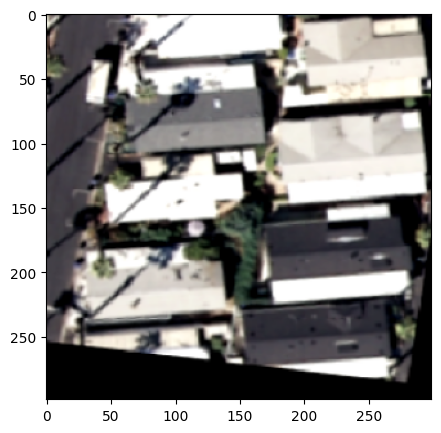

In [19]:
# Get a batch of images and labels from the generator
batch_images, batch_labels = train_generator.next()

print(type(batch_images))
print(type(batch_labels))

print((batch_images).shape)
print(list(train_generator.class_indices.keys()))
print((batch_labels)[0])

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(batch_images[0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(128, 299, 299, 3)
['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


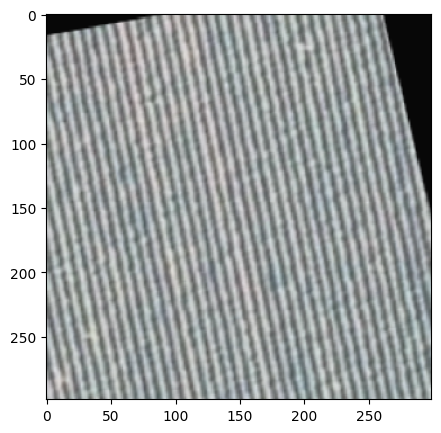

In [20]:
# Get a batch of images and labels from the generator
batch_images, batch_labels = test_generator.next()

print(type(batch_images))
print(type(batch_labels))

print((batch_images).shape)
print(list(train_generator.class_indices.keys()))
print((batch_labels)[6])

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(batch_images[6])

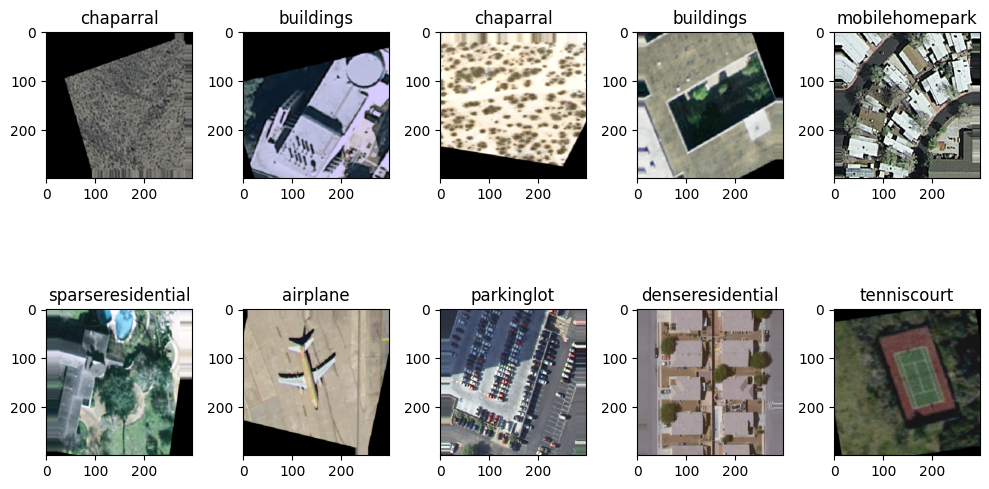

In [21]:
# Get a batch of images and labels from the generator
batch_images, batch_labels = train_generator.next()

# Extract the class indices from the one-hot encoded labels
class_indices = batch_labels.argmax(axis=1)

# Get the class labels from the generator
class_labels = list(train_generator.class_indices.keys())

# Define a 2x5 grid for plotting
rows, cols = 2, 5

# Create a Matplotlib figure and axis
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

# Plot each image with its corresponding class name
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        axes[i, j].imshow(batch_images[index])
        axes[i, j].set_title(class_labels[class_indices[index]])
        axes[i, j].axis('on')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
list(test_generator.class_indices.keys())

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

# Modelling - Load pre trained models

In [23]:
######################################
#
# Pre trained:    InceptionV3
#
######################################

from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import RMSprop
from keras import layers
import keras
from PIL import Image
import datetime
from keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler, EarlyStopping

NUM_CLASSES = len(os.listdir(DAT_TRAIN))

# Define Tensorboard callback with dedicated log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = TensorBoard(log_dir=log_dir, update_freq=1)

def InitializeInceptionV3Model():
    pre_trained_model = InceptionV3(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top=False, weights = 'imagenet')

    for layer in pre_trained_model.layers:
        layer.trainable=False

    x = layers.Flatten()(pre_trained_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    model = keras.Model(pre_trained_model.input, x)
    return model


if 'model' in locals() or 'model' in globals():
    if input('Train a fresh model?') == 'y':
        print('Discarding current model')
        model = InitializeInceptionV3Model()
else:
    model = InitializeInceptionV3Model()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


87910968/87910968 [==============================] - 5s 0us/step


In [24]:
EPOCHS = 3

hist = model.fit(
    train_generator,
    epochs=EPOCHS,
    # steps_per_epoch=int(len(train_generator)/BATCH_SIZE)/3,
    validation_data=val_generator,
    # validation_steps=int(len(val_generator)/BATCH_SIZE)/3,
    verbose=1,
    callbacks=[early_stopping, tb_callback])


Epoch 1/3
58/58 [==============================] - 224s 3s/step - loss: 24.1159 - accuracy: 0.5488 - val_loss: 0.7523 - val_accuracy: 0.7695
Epoch 2/3
58/58 [==============================] - 199s 3s/step - loss: 0.6290 - accuracy: 0.8107 - val_loss: 0.4099 - val_accuracy: 0.8748
Epoch 3/3
58/58 [==============================] - 200s 3s/step - loss: 0.3851 - accuracy: 0.8774 - val_loss: 0.3208 - val_accuracy: 0.9062


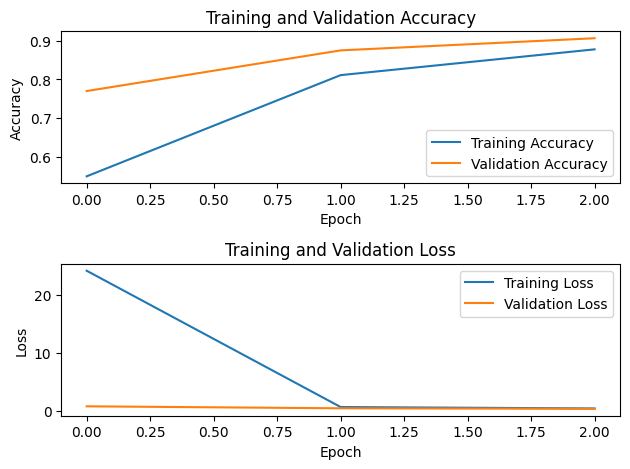

In [28]:
# Plot training history for accuracy
plt.subplot(2, 1, 1)
plt.plot(hist.history["accuracy"], label = "Training Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot training history for loss
plt.subplot(2, 1, 2)
plt.plot(hist.history["loss"], label = "Training Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
#######################################################
#  Save the model
#######################################################

# TODO: model name in filename
model.save(MODEL_DIR + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +
    'model_' + 'inceptionv3' + 'Landusage')

In [ ]:
#######################################################
#  Load a model
#######################################################
from keras import models

#model = models.load_model(MODEL_DIR + 'model_checkpoint')
model = models.load_model(MODEL_DIR + '20231130-075806model_inceptionv3Landusage')

# Model Evaluation

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

def decode_labels(labels):
    return np.argmax(labels, axis = 1)

In [33]:
predictions = model.predict(test_generator)

9/9 [==============================] - 12s 1s/step


In [47]:
predictions[0]

array([9.9997652e-01, 8.0889340e-12, 1.0153068e-05, 4.1074575e-09,
       4.4629563e-14, 5.8526502e-06, 2.6771842e-11, 2.0223110e-06,
       3.2518905e-08, 1.6354604e-10, 2.8621436e-14, 3.4050915e-09,
       2.3267777e-10, 2.0461121e-08, 4.9631635e-06, 1.2142360e-13,
       2.4118117e-11, 4.9814651e-07, 3.5279851e-10, 2.3698798e-09,
       3.0964672e-11], dtype=float32)

In [49]:
all_pred_classes = [np.argmax(i) for i in predictions]
true_labels = (test_generator.classes)

In [50]:
print(all_pred_classes[:10])
print(true_labels[:10])

[0, 8, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 0 0]


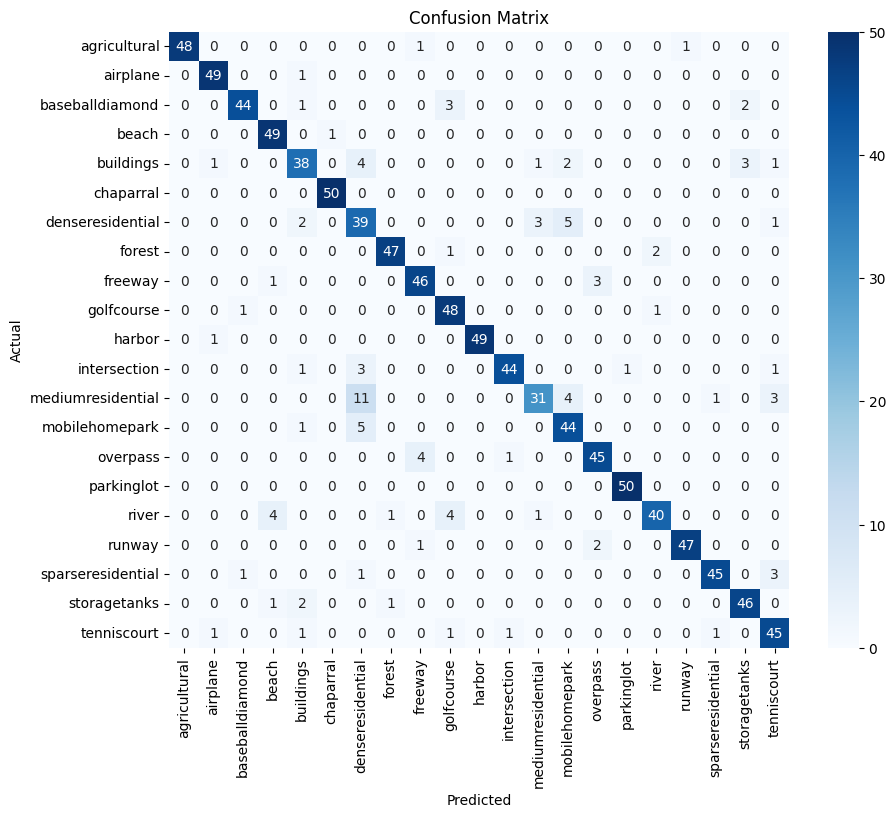

In [51]:
cmt = confusion_matrix(true_labels, all_pred_classes)

plt.figure(figsize = (10, 8))
sns.heatmap(cmt, annot = True, fmt = "d", cmap = "Blues", xticklabels = list(test_generator.class_indices.keys()), yticklabels = list(test_generator.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Test Acc

In [52]:
# Evaluate the model on the test data
evaluation_result = model.evaluate(test_generator)

# Print the test accuracy
test_accuracy = evaluation_result[1]  # Assuming accuracy is the second metric
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

9/9 [==============================] - 6s 664ms/step - loss: 0.3216 - accuracy: 0.8990
Test Accuracy: 89.90%


In [53]:
files = test_generator.filenames
class_dict = test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key   # dictionary of the form class index: class name

predictions = model.predict(test_generator)


for i, p in enumerate(predictions):
    if i < 200:
      continue
    index=np.argmax(p)
    klass=rev_dict[index]
    prob=p[index]
    print('for file ', files[i], ' predicted class is ', klass,' with probability ',prob)
    if i == 210:
      break

9/9 [==============================] - 7s 804ms/step
for file  buildings/buildings_000005.png  predicted class is  buildings  with probability  0.99583745
for file  buildings/buildings_000016.png  predicted class is  storagetanks  with probability  0.43151826
for file  buildings/buildings_000026.png  predicted class is  airplane  with probability  0.3850598
for file  buildings/buildings_000065.png  predicted class is  buildings  with probability  0.99620324
for file  buildings/buildings_000066.png  predicted class is  buildings  with probability  0.9897848
for file  buildings/buildings_000068.png  predicted class is  buildings  with probability  0.50317657
for file  buildings/buildings_000082.png  predicted class is  buildings  with probability  0.9983382
for file  buildings/buildings_000088.png  predicted class is  buildings  with probability  0.9987704
for file  buildings/buildings_000098.png  predicted class is  buildings  with probability  0.5326141
for file  buildings/buildings_00

4/4 [==============================] - 0s 116ms/step


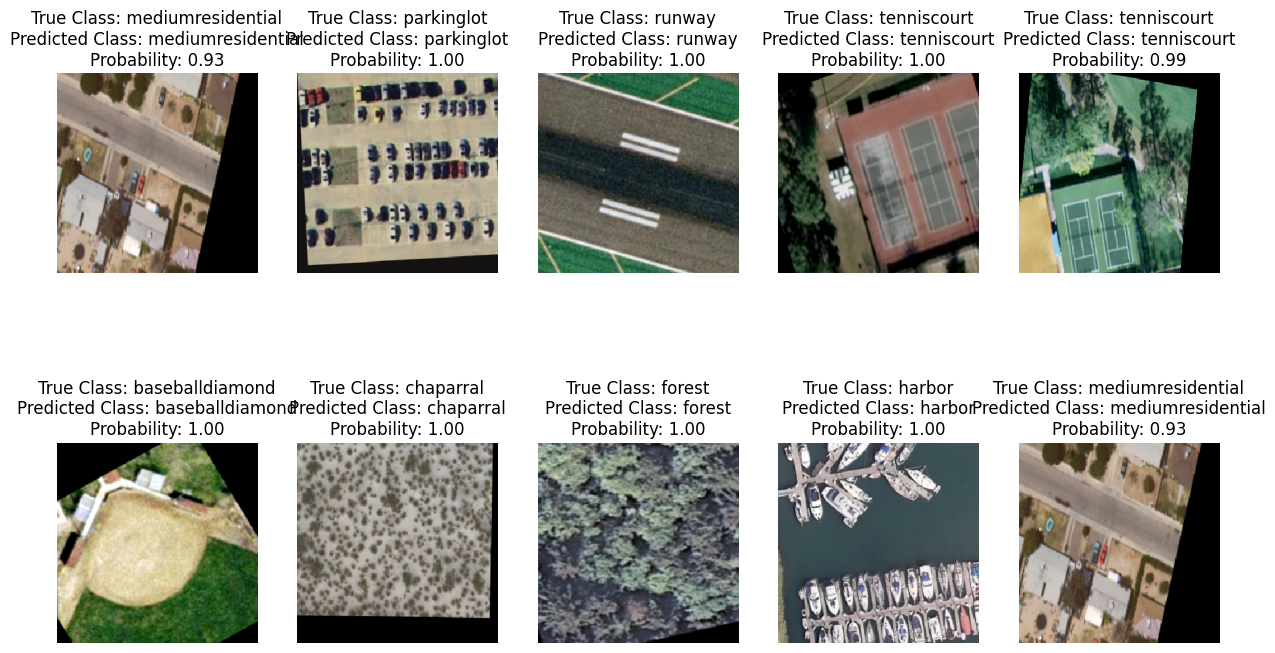

In [54]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class_dict = test_generator.class_indices
rev_dict = {value: key for key, value in class_dict.items()}

# Set up a 2x5 subplot grid for displaying images and predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)

# Iterate over the generator directly
for i in range(10):
    img_batch, label_batch = next(test_generator)

    # Make predictions for the current batch
    predictions = model.predict(img_batch)

    for j in range(len(img_batch)):
        true_class_index = np.argmax(label_batch[j])
        true_class = rev_dict[true_class_index]

        predicted_class_index = np.argmax(predictions[j])
        predicted_class = rev_dict[predicted_class_index]
        prob = predictions[j][predicted_class_index]

        # Load and display the image
        img = img_batch[j]
        ax = axes[i // 5, i % 5]
        ax.imshow(img)  # Normalize pixel values to [0, 1]
        ax.set_title(f"True Class: {true_class}\nPredicted Class: {predicted_class}\nProbability: {prob:.2f}")
        ax.axis("off")

plt.show()


In [55]:
class_dict.items()

dict_items([('agricultural', 0), ('airplane', 1), ('baseballdiamond', 2), ('beach', 3), ('buildings', 4), ('chaparral', 5), ('denseresidential', 6), ('forest', 7), ('freeway', 8), ('golfcourse', 9), ('harbor', 10), ('intersection', 11), ('mediumresidential', 12), ('mobilehomepark', 13), ('overpass', 14), ('parkinglot', 15), ('river', 16), ('runway', 17), ('sparseresidential', 18), ('storagetanks', 19), ('tenniscourt', 20)])

In [56]:
quick_id = 4
print(files[quick_id])
print(class_dict)
print(predictions[quick_id])
print(np.argmax(predictions[quick_id]))

agricultural/agricultural_000052.png
{'agricultural': 0, 'airplane': 1, 'baseballdiamond': 2, 'beach': 3, 'buildings': 4, 'chaparral': 5, 'denseresidential': 6, 'forest': 7, 'freeway': 8, 'golfcourse': 9, 'harbor': 10, 'intersection': 11, 'mediumresidential': 12, 'mobilehomepark': 13, 'overpass': 14, 'parkinglot': 15, 'river': 16, 'runway': 17, 'sparseresidential': 18, 'storagetanks': 19, 'tenniscourt': 20}
[4.1354983e-10 2.5128521e-09 1.8483364e-12 1.5996797e-14 1.4662586e-10
 1.5921033e-14 5.3753482e-12 9.9841587e-13 9.0842920e-15 2.9443806e-12
 1.0000000e+00 5.3016744e-14 2.4442698e-13 5.4135637e-15 1.2730269e-12
 4.0951804e-08 7.5465608e-14 1.1439026e-14 1.9112814e-11 3.4215560e-14
 1.1258502e-14]
10


In [57]:
#######################################################
#  Classify the test set
#######################################################

# Classify
test_generator.reset()
probabilities = model.predict(test_generator)
filenames = test_generator.filenames.copy()
for i in range(0,len(filenames)):
    filenames[i] = filenames[i][filenames[i].rfind('\\')+1:]
predicted_class_indices = np.argmax(probabilities, axis=-1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

# Create the pandas DataFrame
results=pd.DataFrame({"img_name":filenames,
                      "prediction":predictions})

results.to_csv(DAT_DIR + '/predictions.csv', index=False)
results

9/9 [==============================] - 7s 842ms/step


,img_name,prediction
0,agricultural/agricultural_000007.png,agricultural
1,agricultural/agricultural_000028.png,freeway
2,agricultural/agricultural_000033.png,agricultural
3,agricultural/agricultural_000042.png,agricultural
4,agricultural/agricultural_000052.png,agricultural
...,...,...
1045,tenniscourt/tenniscourt_000446.png,tenniscourt
1046,tenniscourt/tenniscourt_000485.png,tenniscourt
1047,tenniscourt/tenniscourt_000488.png,tenniscourt
1048,tenniscourt/tenniscourt_000494.png,tenniscourt


In [58]:
for i in range(results.shape[0]):
  if results.iloc[i, :]['prediction'] not in results.iloc[i, :]['img_name']:
    print(results.iloc[i, :])

img_name      agricultural/agricultural_000028.png
prediction                                 freeway
Name: 1, dtype: object
img_name      agricultural/agricultural_000403.png
prediction                                  runway
Name: 39, dtype: object
img_name      airplane/airplane_000249.png
prediction                       buildings
Name: 73, dtype: object
img_name      baseballdiamond/baseballdiamond_000007.png
prediction                                    golfcourse
Name: 101, dtype: object
img_name      baseballdiamond/baseballdiamond_000177.png
prediction                                     buildings
Name: 122, dtype: object
img_name      baseballdiamond/baseballdiamond_000229.png
prediction                                  storagetanks
Name: 125, dtype: object
img_name      baseballdiamond/baseballdiamond_000312.png
prediction                                    golfcourse
Name: 130, dtype: object
img_name      baseballdiamond/baseballdiamond_000379.png
prediction                

In [59]:
results.iloc[1038, :]

img_name      tenniscourt/tenniscourt_000396.png
prediction                          intersection
Name: 1038, dtype: object